<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_65_introduction_to_random_forest/Lecture_65_part_02_Random_forest_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**How Random Forest Performs So Well?**

# **Bias Variance Trade-Off in Random Forest**

In [29]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [30]:
# Generate synthetic data for classification using make_circles
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

In [31]:
# Display the shape of the generated data (number of samples, number of features)
X.shape

(500, 2)

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

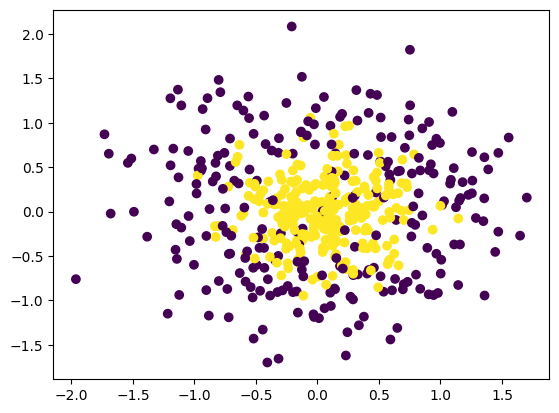

In [33]:
# Visualize the generated data points, colored by their class
plt.scatter(X[:, 0], X[:, 1], c=y)

In [34]:
# Import the Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

In [35]:
# Initialize and train a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

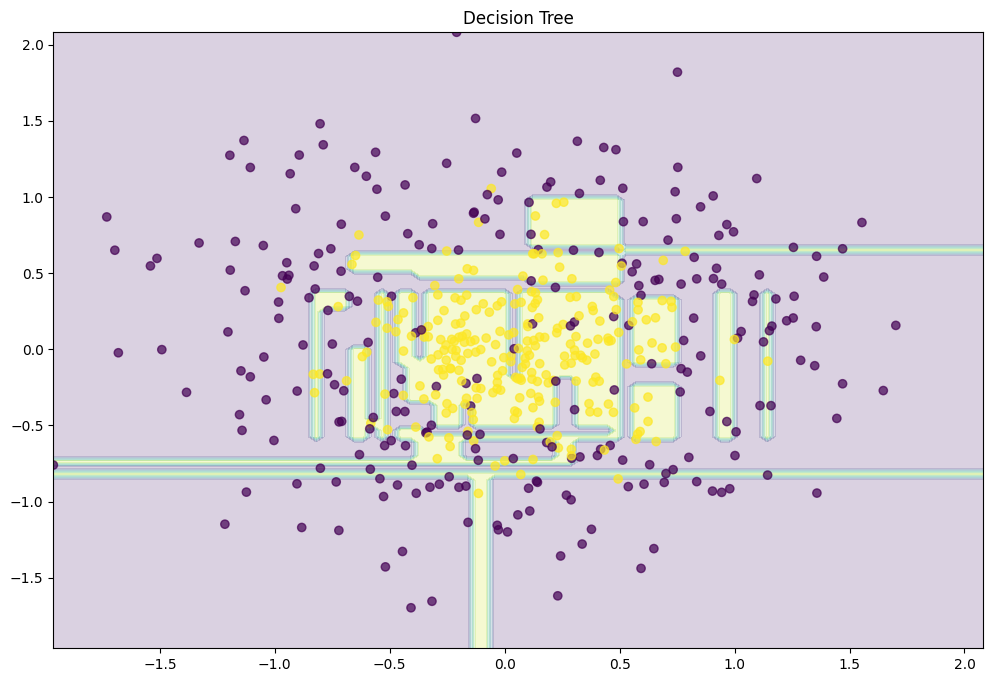

In [36]:
# Visualize the decision boundary of the trained Decision Tree Classifier
plt.figure(figsize=(12, 8))

x_range = np.linspace(X.min(), X.max(), 100)

xx1, xx2 = np.meshgrid(x_range, x_range)

y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])

y_hat = y_hat.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_hat, alpha=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=.7)

plt.title('Decision Tree')
plt.show()


In [37]:
# Import the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Initialize and train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

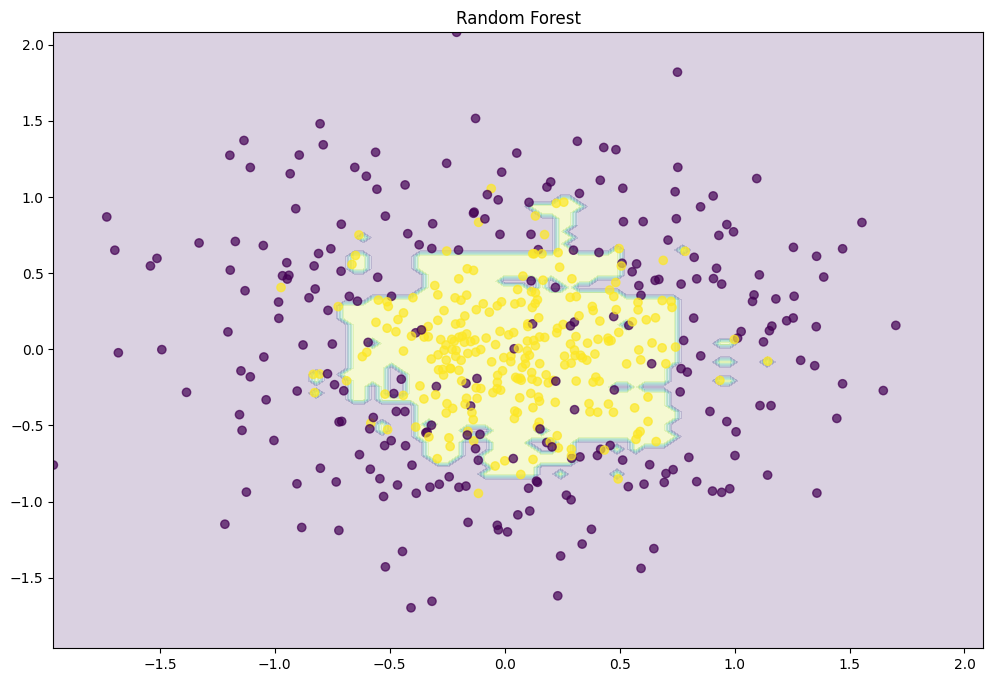

In [39]:
# Visualize the decision boundary of the trained Random Forest Classifier
plt.figure(figsize=(12, 8))

x_range = np.linspace(X.min(), X.max(), 100)

xx1, xx2 = np.meshgrid(x_range, x_range)

y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])

y_hat = y_hat.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_hat, alpha=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=.7)

plt.title('Random Forest') # Corrected title from 'Decision Tree' to 'Random Forest'
plt.show()

In [40]:
# Define parameters for generating regression data
n_train = 150
n_test = 1000
noise = 0.1

# Define the true function to generate data from
def f(x):
  x = x.ravel()
  return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

In [41]:
# Function to generate synthetic regression data with noise
def generate(n_samples, noise):
  X = np.random.rand(n_samples) * 10 - 5
  X = np.sort(X).ravel()
  y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
      np.random.normal(0.0, noise, n_samples)
  X = X.reshape((n_samples, 1))
  return X, y

In [42]:
# Generate training and testing data for the regression task
X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

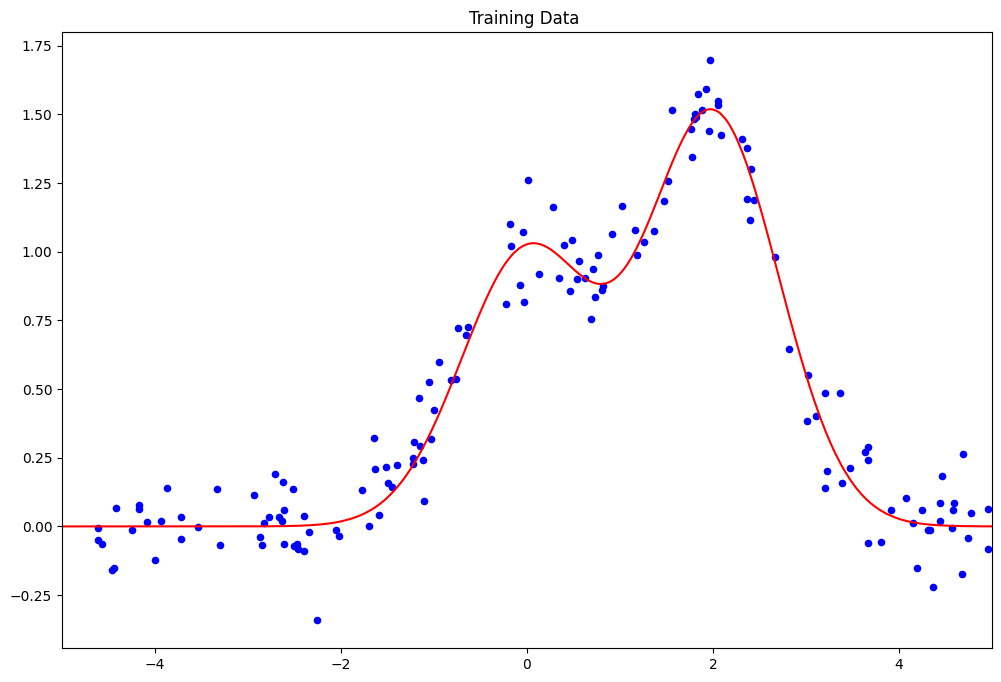

In [43]:
# Visualize the generated training data and the true function
plt.figure(figsize=(12, 8))
plt.plot(X_test, f(X_test), 'r') # Plot the true function
plt.scatter(X_train, y_train, c='b', s=20) # Plot the training data points
plt.xlim([-5, 5])
plt.title('Training Data ')
plt.show()

In [44]:
# Import the Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

In [45]:
# Initialize and train a Decision Tree Regressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
# Make predictions on the test data using the Decision Tree Regressor
d_predict = dtree.predict(X_test)


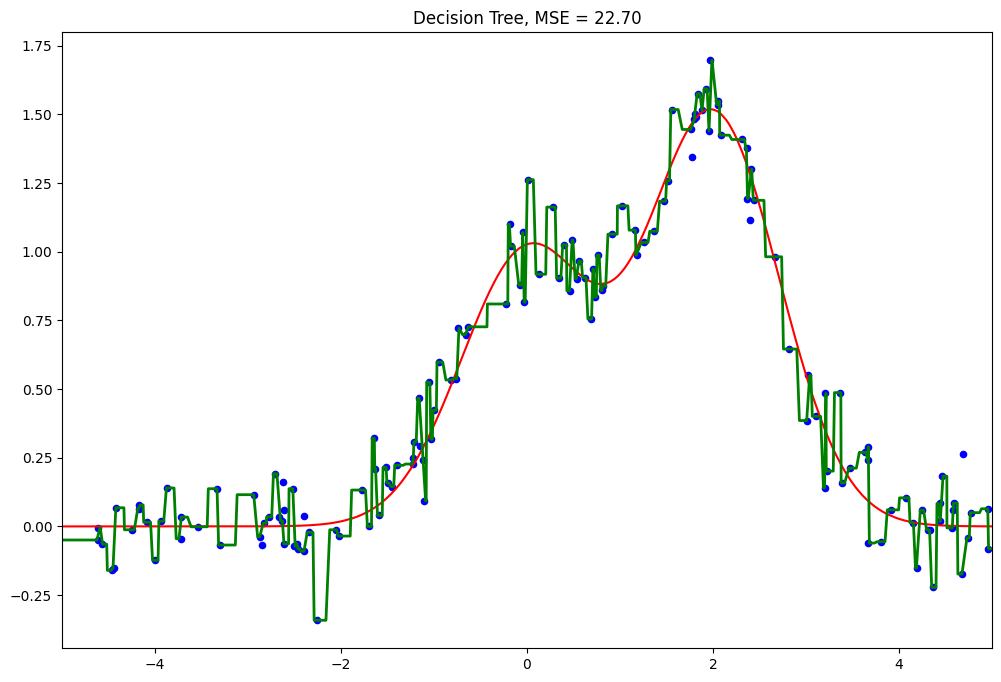

In [46]:
# Visualize the Decision Tree Regressor's predictions compared to the true function and training data
plt.figure(figsize=(12, 8))
plt.plot(X_test, f(X_test), 'r') # Plot the true function
plt.scatter(X_train, y_train, c='b', s=20) # Plot the training data points
plt.plot(X_test, d_predict, 'g',lw=2) # Plot the Decision Tree predictions
plt.xlim([-5, 5])
# Calculate and display the Mean Squared Error (MSE) for the Decision Tree predictions
plt.title('Decision Tree, MSE = %.2f' %np.sum((y_test - d_predict) ** 2 ))
plt.show()

In [47]:
# Import the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
# Initialize and train a Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=500,random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [48]:
# Make predictions on the test data using the Random Forest Regressor
rf_predict = rfr.predict(X_test)

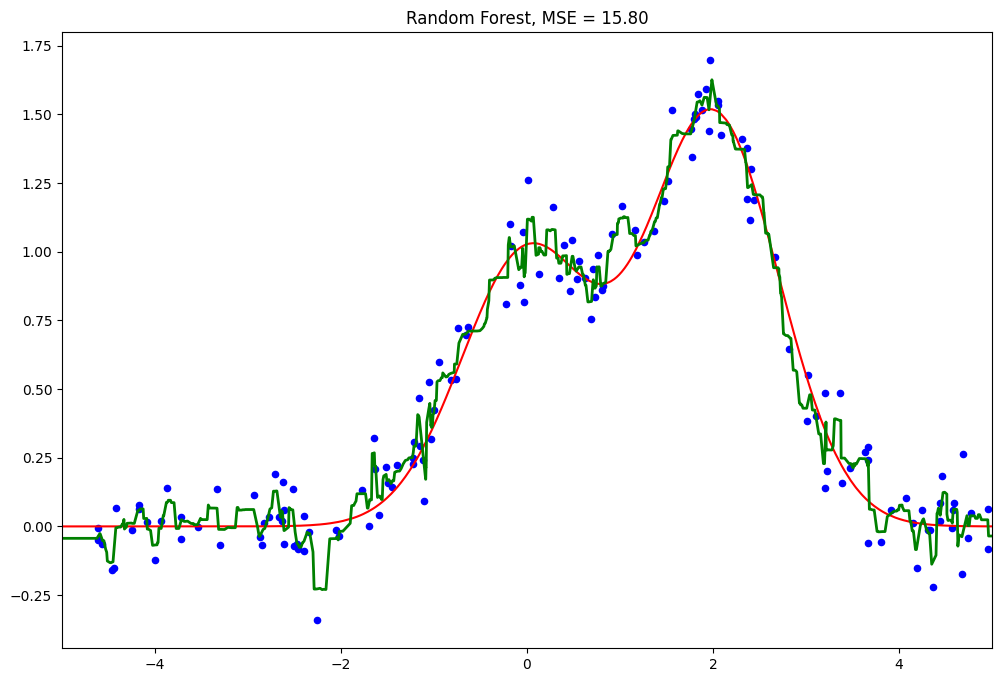

In [49]:
# Visualize the Random Forest Regressor's predictions compared to the true function and training data
plt.figure(figsize=(12, 8))
plt.plot(X_test, f(X_test), 'r') # Plot the true function
plt.scatter(X_train, y_train, c='b', s=20) # Plot the training data points
plt.plot(X_test, rf_predict, 'g',lw=2) # Plot the Random Forest predictions
plt.xlim([-5, 5])
# Calculate and display the Mean Squared Error (MSE) for the Random Forest predictions
plt.title('Random Forest, MSE = %.2f' %np.sum((y_test - rf_predict) ** 2 )) # Corrected title to Random Forest
plt.show()